In [ ]:
!pip install matplotlib py-raccoon

This Notebook first shows how to sample a random cell complex based on a G(n,p) random graph. Below the plotting of that graph, you can find an example on a real-world graph as well.

In [1]:
import py_raccoon as pr
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [2]:
n = 6
p = 0.7

N = np.zeros(n + 1)
N[3] = 3
N[5] = 1

G, cells, _, _ = pr.uniform_cc(n, 0.5, N, samples=1000, seed=43)

In [3]:
# With seed 43, our algorithm finds two cells with boundary length 5 instead of one.
# Since `N` is an *expected* number of 2-cells, this or similar behavior is to be expected.
cells

{(0, 1, 3, 5, 2), (0, 1, 4, 3, 5), (0, 1, 5), (0, 2, 5), (1, 3, 4)}

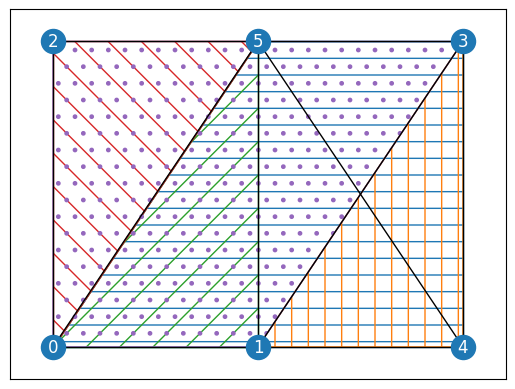

In [4]:
# Plot cell complex
pos = { 0: (0,0), 1: (1,0), 2: (0,1), 3: (2,1), 4: (2,0), 5: (1,1) }
plt.figure()
color = matplotlib.colormaps.get('tab10')
hatches = ['-', '|', '/', '\\', '.']
for i, c in enumerate(cells):
    plt.fill([pos[node][0] for node in c], [pos[node][1] for node in c], hatch=hatches[i], fill=False, edgecolor=color(i))   
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
_ = nx.draw_networkx_labels(G, pos, font_color='w')

In [5]:
G = nx.karate_club_graph()
# Estimate Erdős-Rényi parameters for G
n, p = pr.utils.estimate_er_params(G)

# A single number will distribute the cells evenly (in expectation) among the occurring lengths
_, cells, _, _ = pr.uniform_cc(n, p, N=5, G=G)
cells

{(0, 1, 7, 3, 2, 32, 23, 29, 33, 8),
 (0, 8, 2, 32, 29, 33, 19),
 (8, 30, 32, 23, 33),
 (8, 32, 22, 33)}